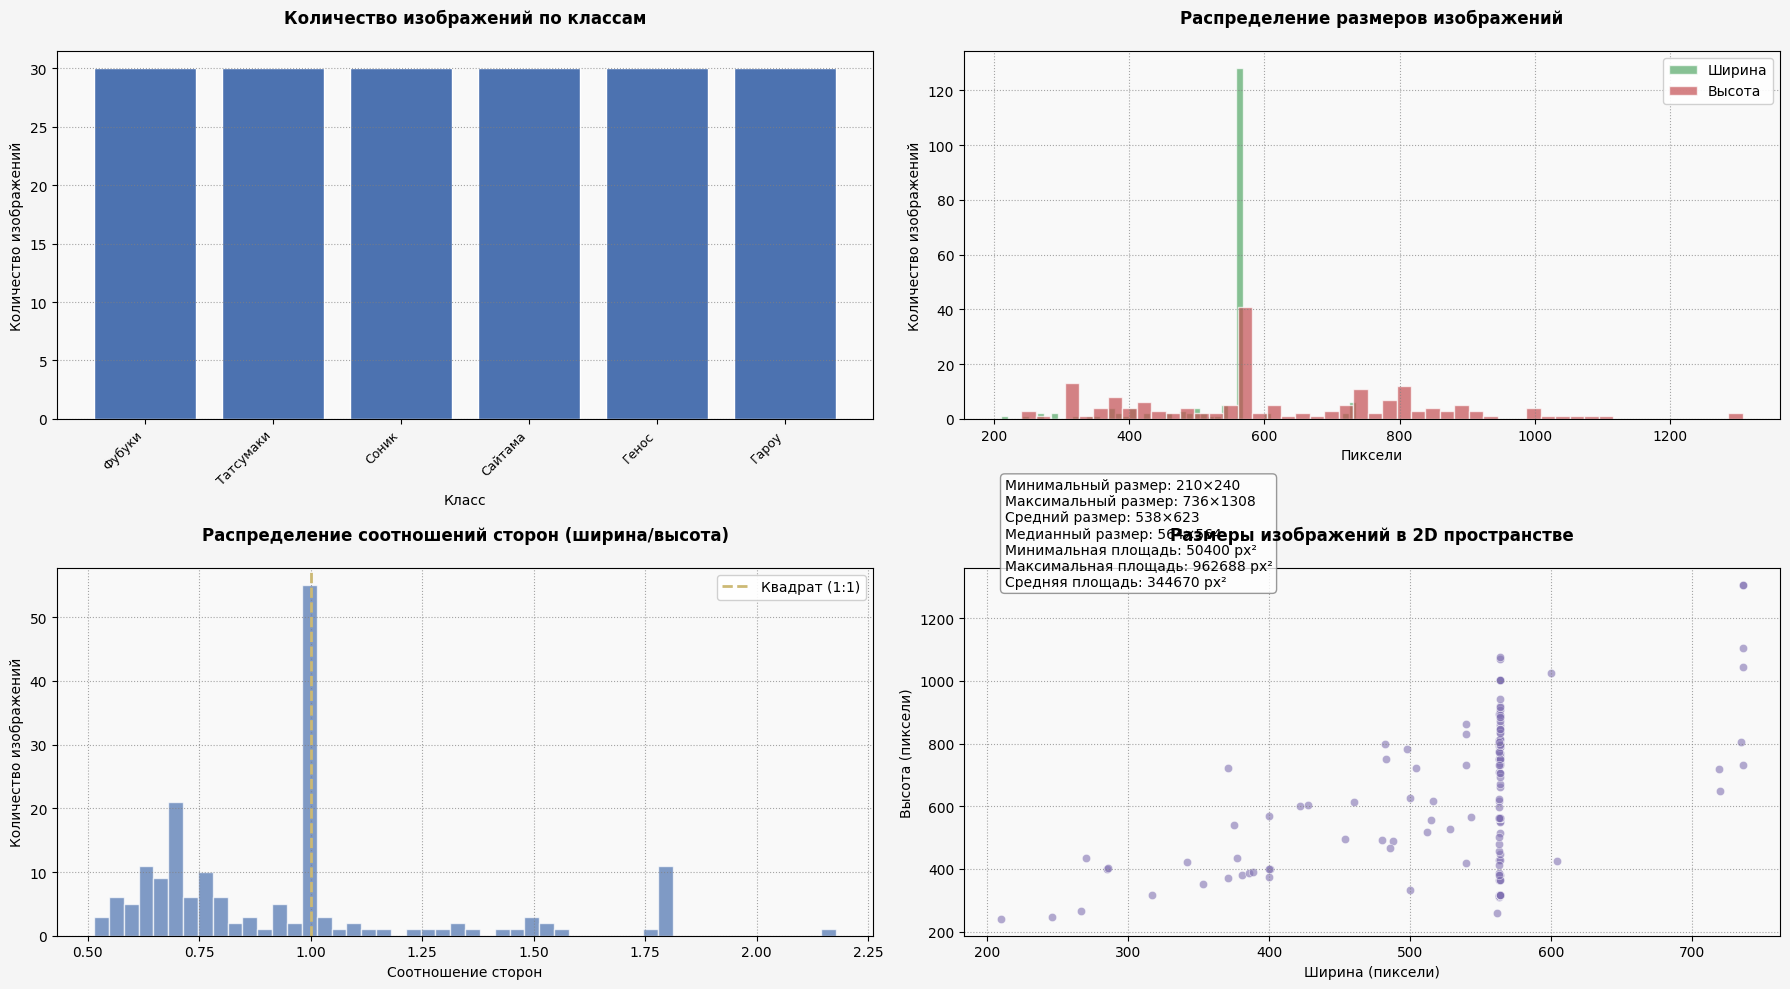

Всего классов: 6
Всего изображений: 180

Размеры изображений:
  Ширина: min=210, max=736, mean=538.9, median=564.0
  Высота: min=240, max=1308, mean=623.6, median=564.0
  Площадь: min=50400, max=962688, mean=344670.9, median=318096.0

Количество изображений по классам:
  Гароу: 30 изображений
  Генос: 30 изображений
  Сайтама: 30 изображений
  Соник: 30 изображений
  Татсумаки: 30 изображений
  Фубуки: 30 изображений


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

# Путь к данным
data_path = "data/train"  # Укажите ваш путь к данным

# 1. Подсчет изображений по классам
class_counts = defaultdict(int)
all_sizes = []  # Для хранения размеров всех изображений
class_sizes = defaultdict(list)  # Размеры изображений по классам

# Проходим по всем классам и изображениям
for class_name in os.listdir(data_path):
    class_dir = os.path.join(data_path, class_name)
    
    if not os.path.isdir(class_dir):
        continue
    
    # Для каждого изображения в классе
    for img_name in os.listdir(class_dir):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img_path = os.path.join(class_dir, img_name)
            
            # Открываем изображение и получаем размер
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    size = (width, height)
                    
                    # Сохраняем размеры
                    all_sizes.append(size)
                    class_sizes[class_name].append(size)
                    class_counts[class_name] += 1
            except Exception as e:
                print(f"Ошибка при обработке {img_path}: {e}")

# 2. Расчет статистики размеров
# Извлекаем ширину и высоту
widths = [size[0] for size in all_sizes]
heights = [size[1] for size in all_sizes]
areas = [size[0] * size[1] for size in all_sizes]

# Основная статистика
size_stats = {
    "width": {
        "min": min(widths),
        "max": max(widths),
        "mean": np.mean(widths),
        "median": np.median(widths)
    },
    "height": {
        "min": min(heights),
        "max": max(heights),
        "mean": np.mean(heights),
        "median": np.median(heights)
    },
    "area": {
        "min": min(areas),
        "max": max(areas),
        "mean": np.mean(areas),
        "median": np.median(areas)
    }
}

# 3. Визуализация с обновленными цветами
plt.figure(figsize=(18, 10), facecolor='#f5f5f5')  # Светло-серый фон

# Цветовая палитра
colors = {
    'bar': '#4c72b0',       # Синий
    'hist1': '#55a868',     # Зеленый
    'hist2': '#c44e52',     # Красный
    'scatter': '#8172b2',   # Фиолетовый
    'line': '#ccb974'       # Золотистый
}

# График 1: Распределение по классам
plt.subplot(2, 2, 1)
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Сортируем классы по количеству изображений
sorted_classes = [x for _, x in sorted(zip(counts, classes), reverse=True)]
sorted_counts = sorted(counts, reverse=True)

plt.bar(sorted_classes, sorted_counts, color=colors['bar'], edgecolor='white')
plt.title('Количество изображений по классам', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Класс', fontsize=10)
plt.ylabel('Количество изображений', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.gca().set_facecolor('#f9f9f9')
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.7)

# График 2: Распределение ширины и высоты
plt.subplot(2, 2, 2)
plt.hist(widths, bins=50, alpha=0.7, label='Ширина', color=colors['hist1'], edgecolor='white')
plt.hist(heights, bins=50, alpha=0.7, label='Высота', color=colors['hist2'], edgecolor='white')
plt.title('Распределение размеров изображений', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Пиксели', fontsize=10)
plt.ylabel('Количество изображений', fontsize=10)
plt.legend(framealpha=0.9, facecolor='white')
plt.gca().set_facecolor('#f9f9f9')
plt.grid(linestyle=':', color='gray', alpha=0.7)

# График 3: Соотношение сторон
plt.subplot(2, 2, 3)
aspect_ratios = [w/h for w, h in all_sizes]
plt.hist(aspect_ratios, bins=50, color=colors['bar'], alpha=0.7, edgecolor='white')
plt.title('Распределение соотношений сторон (ширина/высота)', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Соотношение сторон', fontsize=10)
plt.ylabel('Количество изображений', fontsize=10)
plt.axvline(1.0, color=colors['line'], linestyle='--', linewidth=2, label='Квадрат (1:1)')
plt.legend(framealpha=0.9, facecolor='white')
plt.gca().set_facecolor('#f9f9f9')
plt.grid(linestyle=':', color='gray', alpha=0.7)

# График 4: Размеры в 2D пространстве
plt.subplot(2, 2, 4)
plt.scatter(widths, heights, alpha=0.6, color=colors['scatter'], edgecolors='white', linewidth=0.5)
plt.title('Размеры изображений в 2D пространстве', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Ширина (пиксели)', fontsize=10)
plt.ylabel('Высота (пиксели)', fontsize=10)
plt.gca().set_facecolor('#f9f9f9')
plt.grid(linestyle=':', color='gray', alpha=0.7)

# Добавляем статистику в качестве аннотации
stats_text = (
    f"Минимальный размер: {size_stats['width']['min']}×{size_stats['height']['min']}\n"
    f"Максимальный размер: {size_stats['width']['max']}×{size_stats['height']['max']}\n"
    f"Средний размер: {int(size_stats['width']['mean'])}×{int(size_stats['height']['mean'])}\n"
    f"Медианный размер: {int(size_stats['width']['median'])}×{int(size_stats['height']['median'])}\n"
    f"Минимальная площадь: {size_stats['area']['min']} px²\n"
    f"Максимальная площадь: {size_stats['area']['max']} px²\n"
    f"Средняя площадь: {int(size_stats['area']['mean'])} px²"
)
plt.annotate(
    stats_text,
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)

plt.tight_layout()
plt.savefig('dataset_analysis.png', dpi=150)
plt.show()

# Выводим статистику в консоль
print(f"Всего классов: {len(class_counts)}")
print(f"Всего изображений: {len(all_sizes)}")
print(f"\nРазмеры изображений:")
print(f"  Ширина: min={size_stats['width']['min']}, max={size_stats['width']['max']}, "
      f"mean={size_stats['width']['mean']:.1f}, median={size_stats['width']['median']}")
print(f"  Высота: min={size_stats['height']['min']}, max={size_stats['height']['max']}, "
      f"mean={size_stats['height']['mean']:.1f}, median={size_stats['height']['median']}")
print(f"  Площадь: min={size_stats['area']['min']}, max={size_stats['area']['max']}, "
      f"mean={size_stats['area']['mean']:.1f}, median={size_stats['area']['median']}")

print("\nКоличество изображений по классам:")
for class_name, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {class_name}: {count} изображений")
